<a href="https://colab.research.google.com/github/archanaade/Demo/blob/master/coffee_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn  matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
df = pd.read_csv("/content/index.csv")
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [ ]:
#check number of rows and columns
df.shape

(1133, 6)

In [ ]:
#check missing values and null values
df.info() #checking coulumn information that it contains null or 0 values
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
#drop null values
df.dropna(inplace=True)
df.isna().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
#change the datatype of column
df['money']=df['money'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1044 non-null   object
 1   datetime     1044 non-null   object
 2   cash_type    1044 non-null   object
 3   card         1044 non-null   object
 4   money        1044 non-null   int64 
 5   coffee_name  1044 non-null   object
dtypes: int64(1), object(5)
memory usage: 57.1+ KB


In [ ]:
#fill missing values with median
df['money'].fillna(df['money'].median(),inplace=True)
df.isna().sum()

/tmp/ipython-input-1965666597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['money'].fillna(df['money'].median(),inplace=True)


,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
#fill missing categorical values with mode
df['date'].fillna(df['date'].mode(),inplace=True)
df['datetime'].fillna(df['datetime'].mode(),inplace=True)
df['cash_type'].fillna(df['cash_type'].mode(),inplace=True)
df['card'].fillna(df['card'].mode(),inplace=True)
df['coffee_name'].fillna(df['coffee_name'].mode(),inplace=True)
df.isna().sum()

/tmp/ipython-input-2874781058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date'].fillna(df['date'].mode(),inplace=True)
/tmp/ipython-input-2874781058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
#convert date to date time type
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1044 non-null   datetime64[ns]
 1   datetime     1044 non-null   object        
 2   cash_type    1044 non-null   object        
 3   card         1044 non-null   object        
 4   money        1044 non-null   int64         
 5   coffee_name  1044 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 57.1+ KB


In [ ]:
# The 'date' column was dropped in a later step before this cell was executed.
# The operations to extract month and year from 'date' have already been performed in cell 'qPyFIwSnPs31'.
# This cell is now redundant and can be removed or its code commented out.
#df['month']=df['datetime'].dt.strftime('%Y-%m')
#df['day']=df['datetime'].dt.strftime('%w')
#df['hour']=df['datetime'].dt.strftime('%H')
df.head()

,datetime,cash_type,card,money,coffee_name,month,year
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38,Latte,3,2024
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38,Hot Chocolate,3,2024
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38,Hot Chocolate,3,2024
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28,Americano,3,2024
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38,Latte,3,2024


In [ ]:
df.dtypes

,0
datetime,object
cash_type,object
card,object
money,int64
coffee_name,object
month,int32
year,int32


In [ ]:
df.describe()

,date,money
count,1044,1044.000000
mean,2024-05-22 10:45:31.034482688,32.141762
min,2024-03-01 00:00:00,18.000000
25%,2024-04-17 18:00:00,28.000000
50%,2024-05-26 00:00:00,32.000000
75%,2024-06-26 00:00:00,37.000000
max,2024-07-31 00:00:00,38.000000
std,NaN,4.913735


In [ ]:
#remove outliers with the help of z-score
from scipy.stats import zscore
z_score=zscore(df['money'])
z_score

array([ 1.19278819,  1.19278819,  1.19278819, ..., -0.02886407,
       -0.02886407, -0.02886407])

In [ ]:
#extract month and year from the date

df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [ ]:
#drop the original date column
df.drop(columns=['date'],inplace=True)

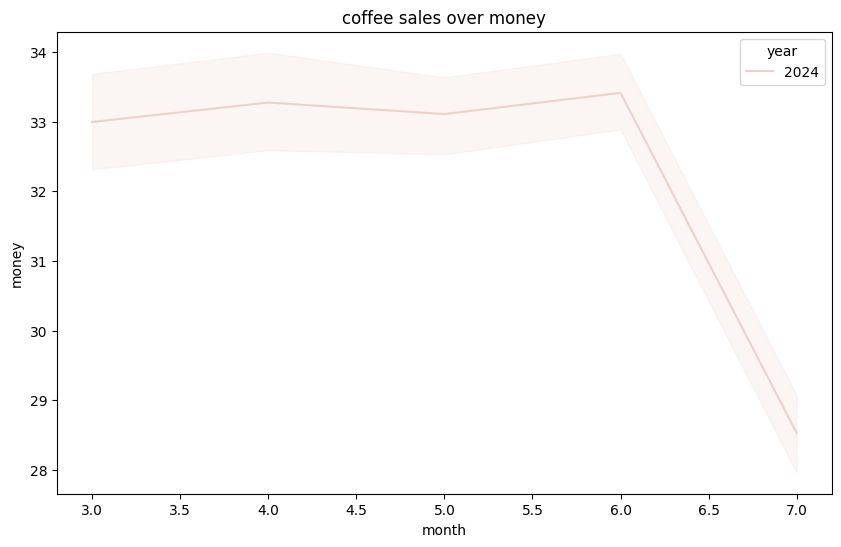

In [ ]:
# Exploratory data analysis
#coffee_name over money, plot line plot
plt.figure(figsize=(10,6))
sns.lineplot(x=df['month'],y=df['money'],hue=df['year'])
plt.title('coffee sales over money')
plt.show()
#below graph shows capuccino has highest price  and espresso has lowest price

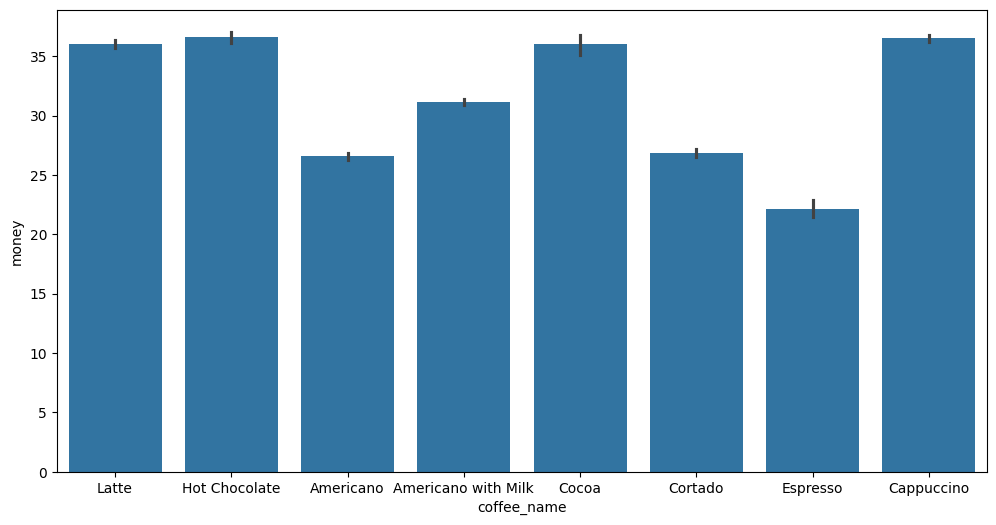

In [ ]:
#barplot coffename over money
plt.figure(figsize=(12,6))
sns.barplot(x=df['coffee_name'],y=df['money'])

plt.show()


above bar_plot shows hot choclate has highest price

In [ ]:
#revenue of coffee sales
revenue_data=df.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)


below graph shows americano with milk and latte has highest revenue while expresso has least

Text(0.5, 0, 'Revenue')

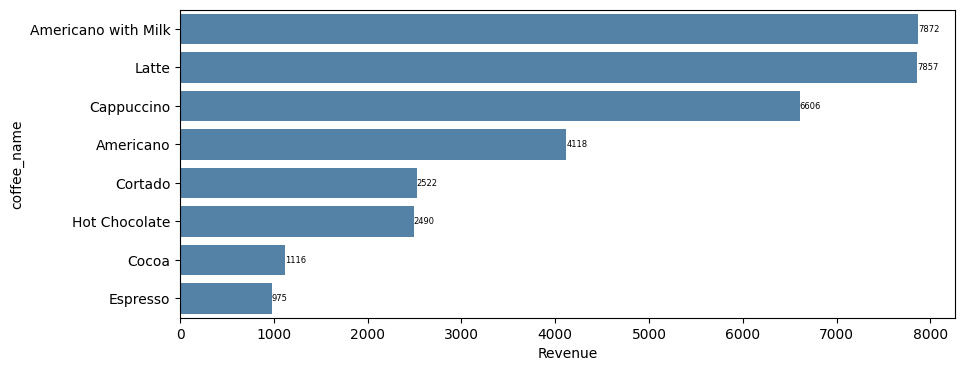

In [ ]:
plt.figure(figsize=(10,4))
ax =sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

In [ ]:
monthly_sales =df.groupby(['coffee_name','month']).count()['datetime'].reset_index().rename(columns={'datetime':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,32,30,15,6,28,9,20,35
1,4,33,38,36,4,16,4,10,27
2,5,40,54,52,8,17,7,13,50
3,6,14,66,46,4,19,10,14,50
4,7,36,65,32,9,14,14,11,56


In [ ]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
month,3.0,7.0
Americano,14.0,40.0
Americano with Milk,30.0,66.0
Cappuccino,15.0,52.0
Cocoa,4.0,9.0
Cortado,14.0,28.0
Espresso,4.0,14.0
Hot Chocolate,10.0,20.0
Latte,27.0,56.0


([<matplotlib.axis.XTick at 0x7bb4fd637aa0>,
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7')])

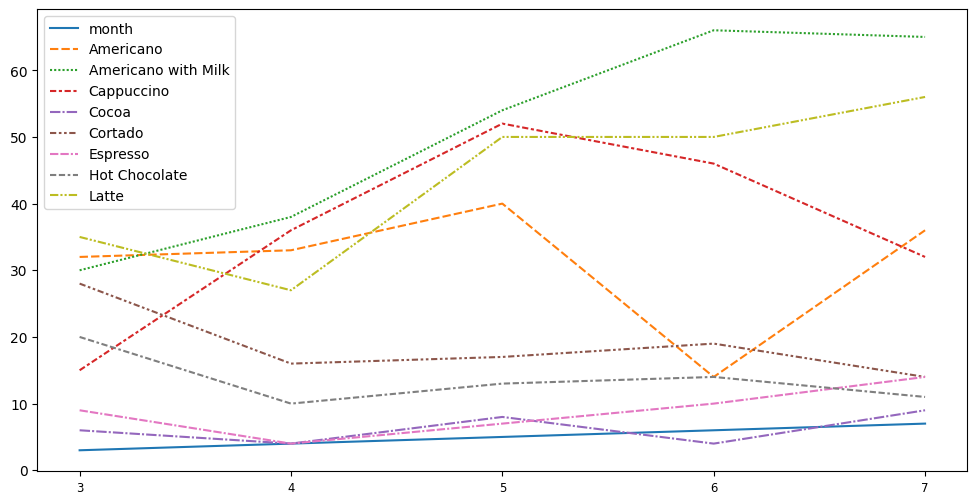

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
#define features and target variable
x=df.drop(columns=['money'])
y=df['money']

In [ ]:
#one hot encoding and categorical variable
x=pd.get_dummies(x,drop_first=True)

In [ ]:
#splitting data into training test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
#training simple model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
#initialize the model
model=LinearRegression()
#train the model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#make pridictions
prdictions=model.predict(x_test)

In [ ]:
#evaluate the model
mse=mean_squared_error(y_test,prdictions)
r2=r2_score(y_test,prdictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.5329310875926376
R-squared: 0.933748137073821


In [ ]:
#model interpretation andconclusion
#we can interpret the model by looking at coeffcients
coefficients=pd.DataFrame({'feature':x_train.columns,'coefficient':model.coef_})
coefficients

,feature,coefficient
0,month,-1.024475e+00
1,year,-1.199041e-14
2,datetime_2024-03-01 12:19:22.539,-4.702567e-02
3,datetime_2024-03-01 12:20:18.089,-1.199041e-14
4,datetime_2024-03-01 13:46:33.006,-3.552714e-15
...,...,...
1492,coffee_name_Cocoa,8.935594e+00
1493,coffee_name_Cortado,-7.052121e-01
1494,coffee_name_Espresso,-4.206085e+00
1495,coffee_name_Hot Chocolate,8.986008e+00
